In [5]:
pip install pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
#from sklearn.clusters import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.cluster import silhouette_samples

In [8]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [138]:
df = pd.read_csv("TiendaOnline.csv").drop(['ID'], axis=1)
df

,Nombre,Edad,Sexo,Categoría de Producto,Compras en el Último Año,Ingreso Anual
0,Ana Martínez,34,Femenino,Electrónica,5,7500
1,Juan Pérez,28,Masculino,Electrodomésticos,2,3500
2,Laura Gómez,40,Femenino,Libros,7,2500
3,Pedro Ruiz,30,Masculino,Electrónica,3,6000
4,Marta Díaz,22,Femenino,Electrodomésticos,1,1800
5,Lucas Fernández,45,Masculino,Electrónica,6,9200
6,Claudia Moreno,36,Femenino,Libros,4,4000
7,Ricardo Torres,27,Masculino,Electrodomésticos,5,5000
8,Isabel Vargas,33,Femenino,Electrónica,2,3000
9,Sergio González,29,Masculino,Libros,8,1500


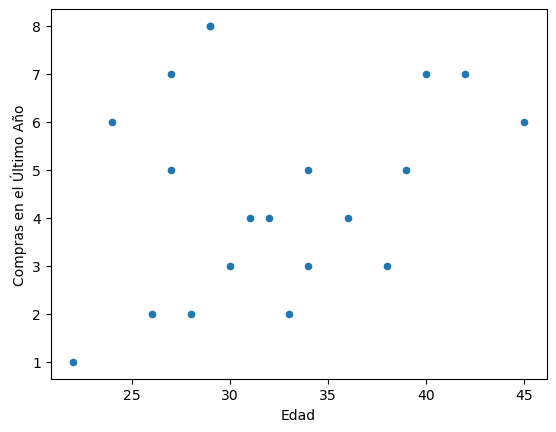

In [10]:
df.plot(kind = 'scatter', x = 'Edad', y = 'Compras en el Último Año')
plt.show()

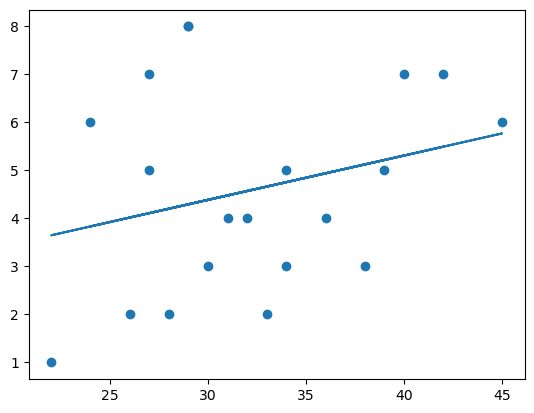

In [11]:
z = np.polyfit(df['Edad'], df['Compras en el Último Año'], 1)
p = np.poly1d(z)

plt.scatter(df['Edad'], df['Compras en el Último Año'])
plt.plot(df['Edad'], p(df['Edad']))
plt.show()

In [148]:
dfCleanEdadCompras = df.drop(['Nombre','Sexo','Categoría de Producto'], axis=1)
dfCleanEdadCompras.sort_values(by = "Edad")

,Edad,Compras en el Último Año,Ingreso Anual
4,22,1,1800
12,24,6,2300
16,26,2,2000
7,27,5,5000
18,27,7,1200
1,28,2,3500
9,29,8,1500
14,29,8,7200
3,30,3,6000
11,31,4,5500


In [152]:
# Principal Components Analysis (PCA)
pca = PCA()
pca.fit_transform(dfCleanEdadCompras)
data_scaled_pca = pca.transform(dfCleanEdadCompras)
data_scaled_pca

array([[ 3.13999895e+03, -3.09856876e+00,  1.37764504e-01],
       [-8.60006015e+02, -3.20591442e+00, -2.15086952e+00],
       [-1.85998561e+03,  1.07543709e+01,  1.71233623e+00],
       [ 1.63999426e+03, -4.96434015e+00, -1.42446582e+00],
       [-2.56001335e+03, -6.65953995e+00, -2.52053896e+00],
       [ 4.84001393e+03,  5.33222860e+00,  3.02524299e-02],
       [-3.59994028e+02,  4.17948668e+00, -9.39120715e-01],
       [ 6.39991216e+02, -6.22187872e+00,  8.83977858e-01],
       [-1.35999778e+03,  2.54020354e+00, -2.61241919e+00],
       [-2.86000105e+03,  1.43792129e+00,  3.78883479e+00],
       [ 1.40008259e+02,  5.30597315e+00, -2.14106071e+00],
       [ 1.13999656e+03, -3.10452352e+00, -5.08834739e-01],
       [-2.06001000e+03, -4.96043662e+00,  2.25013428e+00],
       [ 1.64001331e+03,  7.36261682e+00,  1.41204070e+00],
       [ 2.83999220e+03, -7.32806449e+00,  3.61063174e+00],
       [-8.59996670e+02,  2.86212792e+00, -1.72805180e+00],
       [-2.36000730e+03, -2.88994479e+00

[9.99994586e-01 4.65475941e-06 7.59473506e-07]
[100. 100. 100.]


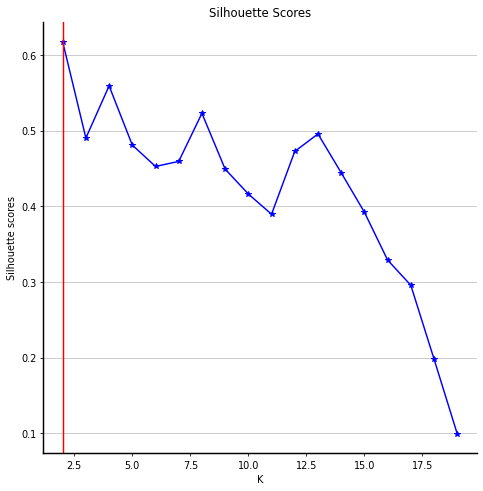

In [166]:
# Determinar la varianza del dataset
var = pca.explained_variance_ratio_
print(var)
# Determinar la varianza acumulada del dataset
cum_var = np.cumsum(np.round(var, decimals=4)*100)
print(cum_var)


sum_of_squared_distances = []
silhouette_scores = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters = k)
    y_predict = km.fit_predict(data_scaled_pca)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled_pca, y_predict))

# Gráfica de silueta
fig, ax = plt.subplots(figsize = (8,8), dpi = 70)
plt.plot(K, silhouette_scores, "b-*")
plt.xlabel("K")
plt.ylabel("Silhouette scores")
plt.title("Silhouette Scores")
plt.axvline(x = 2, color = "r")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

In [94]:
df.drop(['Edad'], axis=1).groupby(["Categoría de Producto"]).sum(numeric_only=True)

,Compras en el Último Año,Ingreso Anual
Categoría de Producto,,
Electrodomésticos,24,25800
Electrónica,33,46400
Libros,35,15000


In [98]:
df.drop(['Compras en el Último Año','Ingreso Anual'], axis=1).groupby(["Categoría de Producto"]).mean(numeric_only=True)

,Edad
Categoría de Producto,
Electrodomésticos,30.714286
Electrónica,34.428571
Libros,31.666667


Categoría de Producto
Electrodomésticos    7
Electrónica          7
Libros               6
Name: count, dtype: int64

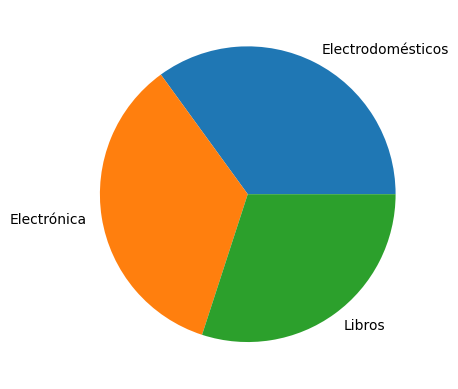

In [132]:
countCategoriasProducto = df.value_counts("Categoría de Producto")
countCategoriasProducto.plot.pie(ylabel="")
countCategoriasProducto